In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [204]:
filename = "ah78_long.csv"
#filename = "ah78_month.csv"
#filename = "ah78_week.csv"

ts = pd.read_csv(filename)

ts["mydate"] = pd.to_datetime(ts.mydate)
ts = ts.set_index("mydate")
ts["yy"] = ts.y.interpolate()
ts.describe()


,y,a,b,c,h,yy
count,148688.000000,151764.000000,151764.000000,151764.000000,59382.000000,151764.000000
mean,6.450520,5.035761,0.168626,0.653877,67.837966,6.462078
std,1.875935,13.420839,0.494799,4.508887,14.436426,1.886439
min,2.164790,0.000000,0.000000,0.000000,40.000000,2.164790
25%,5.106690,0.000000,0.000000,0.000000,59.000000,5.106690
50%,6.161330,0.996000,0.064837,0.000000,65.000000,6.161330
75%,7.493510,3.128000,0.115702,0.000000,73.000000,7.549020
max,21.758900,192.893043,8.416030,80.000000,201.000000,21.758900


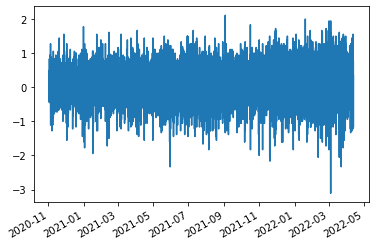

In [205]:
ts.index = pd.DatetimeIndex(ts.index.values, freq="5min")
#train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)

ts["dy"] = ts["yy"].diff(1)
ts["dy"].plot()
plt.show()


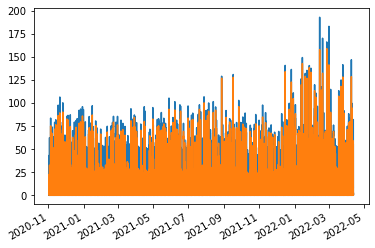

In [206]:
ts["A"] = ts["a"].ewm(halflife='5 min', times=pd.DatetimeIndex(ts.index)).mean()
ts.a.plot()
ts.A.plot()
plt.show()
#ts.describe()


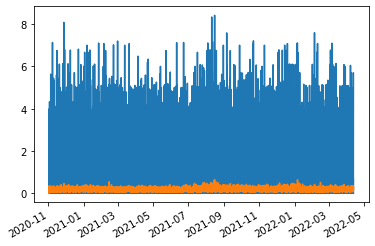

In [207]:
ts["B"] = ts["b"].ewm(halflife='2 hours', times=pd.DatetimeIndex(ts.index)).mean()
ts.b.plot()
ts.B.plot()
plt.show()
#ts.describe()


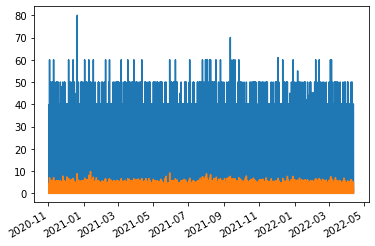

In [208]:
ts["C"] = ts["c"].ewm(halflife='30 min', times=pd.DatetimeIndex(ts.index)).mean()
ts.c.plot()
ts.C.plot()
plt.show()
#ts.describe()


In [209]:
ts["night"] = True 
ts.loc[ts.between_time('06:00','23:59').index,"night"] = False
ts.head()


,y,a,b,c,h,yy,dy,A,B,C,night
2020-11-02 00:03:13,8.65917,1.4320,0.0,0.0,62.0,8.65917,NaN,1.432000,0.000000,0.0,True
2020-11-02 00:08:13,8.65917,1.3650,0.0,0.0,NaN,8.65917,0.00000,1.387333,0.000000,0.0,True
2020-11-02 00:13:13,8.49265,0.6905,1.0,0.0,62.0,8.49265,-0.16652,0.989143,0.343005,0.0,True
2020-11-02 00:18:13,8.32612,1.5205,0.0,0.0,60.0,8.32612,-0.16653,1.272533,0.253504,0.0,True
2020-11-02 00:23:13,8.15960,0.9820,0.0,0.0,61.0,8.15960,-0.16652,1.122581,0.199833,0.0,True


In [210]:
ts["hypo"] = ts["yy"] < 4
ts.hypo.sum()


8217

In [211]:
ts["dips"] = ts.hypo & ts.night
ts.dips.sum()


1978

In [212]:
ts["twos"] = False
ts.loc[ts.index[1:], "twos"] = ts.dips.values[1:] & ts.dips.values[:-1]
ts.twos.sum()


1769

In [213]:
ts["tres"] = False
ts.loc[ts.index[1:-1], "tres"] = ts.dips.values[:-2] & ts.dips.values[1:-1] & ts.dips.values[2:]
ts.tres.sum()


1581

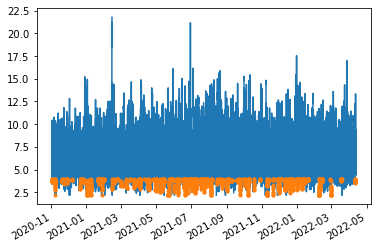

In [214]:
ts["y"].plot()
plt.plot(ts.loc[ts.dips, "y"],'.')
plt.show()


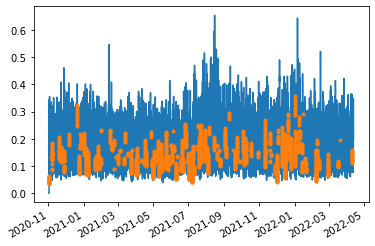

In [215]:
ts.B.plot()
plt.plot(ts.loc[ts.dips, "B"],'.')
plt.show()


In [216]:
ts["fp"] = (ts.B < 0.2) & ts.dips
ts["tp"] = (ts.B > 0.2) & ts.dips
ts.fp.sum(), ts.tp.sum()


(1773, 205)

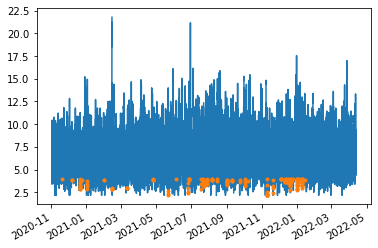

In [217]:
ts["y"].plot()
plt.plot(ts.loc[ts.tp, "y"],'.')
plt.show()


In [218]:
ts.to_csv("simple_" + filename)
